<a href="https://colab.research.google.com/github/ArjanAngenent/ArjanAngenent/blob/main/Copy_V2_of_Bloc5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

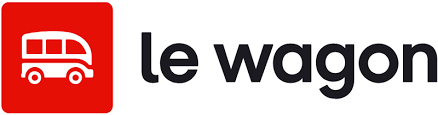


Vous travaillez dans l'équipe data de GreenThumb. Votre mission est d'explorer les données de l'entreprise et de développer un modèle de Deep Learning pour analyser les sentiments des reviews.

Consignes :
- Répondez aux questions : Remplissez les cellules de code ou de texte lorsque vous voyez *Répondez ici*.

- Focus sur les [reviews](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/reviews.csv) : Concentrez-vous sur l'analyse de sentiment des reviews.

- Utilisez le Deep Learning : Développez des modèles de Deep Learning.

- Priorité à l'apprentissage correct : Le temps est limité, l'objectif est d'avoir des modèles qui apprennent correctement, pas nécessairement les plus performants.

# Exploration de la donnée

Nous allons nous concentrer sur le **[reviews_df](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/reviews.csv)**.

Exectuez la cellule ci-dessous pour récupérer la donnée.

In [21]:
import pandas as pd

reviews_df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/reviews.csv")

1 / Supprimez toutes les lignes avec des valeurs manquantes et toutes les lignes en double.

In [22]:

reviews_df = reviews_df.dropna()
reviews_df = reviews_df.drop_duplicates()
reviews_df = reviews_df.reset_index(drop=True)
reviews_df

,ReviewID,ReviewScore,ReviewText,OrderID
0,1,4,"Product came As expected, timely and well-pack...",814344
1,1,5,Indoor Sweet-scented Or Creating Perfect outdo...,501052
2,1,4,"Efficient delivery, item matches the online de...",824173
3,1,4,ITEM ARRIVED ON TIME AND AS DESCRIBED.,8078
4,1,4,"Satisfactory experience, would recommend to ot...",376448
...,...,...,...,...
9241,1,3,pleased with bringing of vibrant perfect color...,131688
9242,1,2,"I WAS REALLY DISAPPOINTED WITH YEARS, THE BONS...",96102
9243,1,4,"Enjoyed desert touch mix home offering cacti,....",79174
9244,1,5,"Thrilled with the purchase, far exceeds expect...",735579


2 / Utilisez la librairie de votre choix pour créer un graphique montrant la répartition des **ReviewScore**.

In [23]:
reviews_df

,ReviewID,ReviewScore,ReviewText,OrderID
0,1,4,"Product came As expected, timely and well-pack...",814344
1,1,5,Indoor Sweet-scented Or Creating Perfect outdo...,501052
2,1,4,"Efficient delivery, item matches the online de...",824173
3,1,4,ITEM ARRIVED ON TIME AND AS DESCRIBED.,8078
4,1,4,"Satisfactory experience, would recommend to ot...",376448
...,...,...,...,...
9241,1,3,pleased with bringing of vibrant perfect color...,131688
9242,1,2,"I WAS REALLY DISAPPOINTED WITH YEARS, THE BONS...",96102
9243,1,4,"Enjoyed desert touch mix home offering cacti,....",79174
9244,1,5,"Thrilled with the purchase, far exceeds expect...",735579


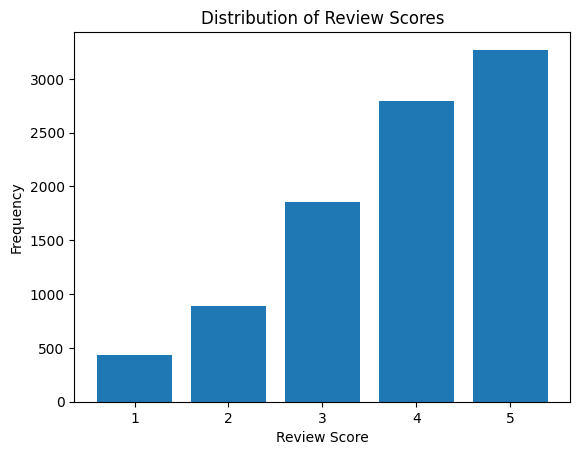

In [54]:
# prompt: Using dataframe reviews_df: histogram

import matplotlib.pyplot as plt
ratings =[1,2,3,4,5]
frequencies = reviews_df['ReviewScore'].value_counts().sort_values()
plt.bar(ratings,frequencies)
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')
plt.show() # Display the histogram


# Préparation de la donnée

3 / Créez votre feature X comprenant la colonne **ReviewText** et votre y comprenant la colonne **ReviewScore**.

In [25]:
X=reviews_df['ReviewText']
y=reviews_df['ReviewScore']

In [26]:
reviews_df

,ReviewID,ReviewScore,ReviewText,OrderID
0,1,4,"Product came As expected, timely and well-pack...",814344
1,1,5,Indoor Sweet-scented Or Creating Perfect outdo...,501052
2,1,4,"Efficient delivery, item matches the online de...",824173
3,1,4,ITEM ARRIVED ON TIME AND AS DESCRIBED.,8078
4,1,4,"Satisfactory experience, would recommend to ot...",376448
...,...,...,...,...
9241,1,3,pleased with bringing of vibrant perfect color...,131688
9242,1,2,"I WAS REALLY DISAPPOINTED WITH YEARS, THE BONS...",96102
9243,1,4,"Enjoyed desert touch mix home offering cacti,....",79174
9244,1,5,"Thrilled with the purchase, far exceeds expect...",735579


4 / Transformez la target en utilisant les correspondances suivantes :
- 1 => 0
- 2 => 0
- 3 => 0
- 4 => 1
- 5 => 1

In [27]:
y = reviews_df['ReviewScore'].map({1: 0, 2: 0, 3: 0, 4: 1, 5: 1})
y

,ReviewScore
0,1
1,1
2,1
3,1
4,1
...,...
9241,0
9242,0
9243,1
9244,1


5 / Utilisez la méthode de hold-out pour ne garder que 20% de la donnée pour le test.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


6 / Appliquez sur le X_train toutes les méthodes de transformations de la donnée que vous connaissez et qui vous paraissent pertinentes.

In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

X_train = X_train.astype(str).fillna('')
X_train = X_train.str.lower()
X_train = X_train.apply(lambda x: re.sub(r'[^\w\s]', '', x))
X_train = X_train.apply(word_tokenize)
lemmatizer = WordNetLemmatizer()
X_train = X_train.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
print(X_train)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


8229    [pleased, with, vera, their, care, plant, easy...
5267    [product, performs, well, for, it, intended, use]
6901    [couldnt, be, happier, with, of, or, natural, ...
6361    [expected, a, lot, more, from, collection, for...
603     [pleasantly, surprised, with, the, quality, at...
                              ...                        
5734    [pleased, with, creating, indoor, it, a, solid...
5191    [enjoyed, curated, fragrance, your, color, blo...
5390    [pleased, with, adding, of, specie, perfect, t...
860     [absolutely, in, love, with, peony, lush, bloo...
7270    [pleased, with, fragrance, selection, of, and,...
Name: ReviewText, Length: 7396, dtype: object


7 / Appliquez sur le X_test les mêmes transformations en les ajustant si nécessaire.

In [30]:
X_train

,ReviewText
8229,"[pleased, with, vera, their, care, plant, easy..."
5267,"[product, performs, well, for, it, intended, use]"
6901,"[couldnt, be, happier, with, of, or, natural, ..."
6361,"[expected, a, lot, more, from, collection, for..."
603,"[pleasantly, surprised, with, the, quality, at..."
...,...
5734,"[pleased, with, creating, indoor, it, a, solid..."
5191,"[enjoyed, curated, fragrance, your, color, blo..."
5390,"[pleased, with, adding, of, specie, perfect, t..."
860,"[absolutely, in, love, with, peony, lush, bloo..."


In [32]:
X_test = X_test.astype(str).fillna('')
X_test = X_test.str.lower()
X_test = X_test.apply(lambda x: re.sub(r'[^\w\s]', '', x))
X_test = X_test.apply(word_tokenize)
lemmatizer = WordNetLemmatizer()
X_test = X_test.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
print(X_test)


6317         [item, arrived, on, time, and, a, described]
5714     [meet, the, requirement, no, complaint, so, far]
7770           [amazing, product, go, above, and, beyond]
4561    [customer, service, wa, helpful, and, responsive]
3918    [absolutely, in, love, with, outdoor, for, jas...
                              ...                        
5942    [bring, piece, tree, is, phenomenal, truly, wo...
5875    [pleased, with, ideal, collection, screen, or,...
48      [good, value, for, the, price, happy, with, th...
4159    [expected, a, lot, more, from, love, a, tulip,...
1053     [highquality, and, reliable, an, excellent, buy]
Name: ReviewText, Length: 1850, dtype: object


# Baseline

8 / Vous voulez prédire la note à partir du commentaire.

- Quel type de tâche est-ce ?

- Quelle métrique est appropriée pour ce type de tâche et pourquoi ?

classification binaire (review score 0 ou 1). La metrique peut être l'accuracy

9 / Calculez un score de baseline.

il s'agit de analyse du sentiment: le plus bas, le plus négative, et vice-versa. Quelle métrique:probabilité.

In [33]:
import numpy as np
from sklearn.metrics import accuracy_score
freq_binary_score = y_train.mode()[0]
print(freq_binary_score)


1


In [34]:
y_pred_baseline = [freq_binary_score] * len(y_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(accuracy_baseline)

0.6535135135135135


In [35]:
pip install protobuf==3.19.6

In [36]:
pip install tensorflow==2.10.0

In [37]:
X_train

,ReviewText
8229,"[pleased, with, vera, their, care, plant, easy..."
5267,"[product, performs, well, for, it, intended, use]"
6901,"[couldnt, be, happier, with, of, or, natural, ..."
6361,"[expected, a, lot, more, from, collection, for..."
603,"[pleasantly, surprised, with, the, quality, at..."
...,...
5734,"[pleased, with, creating, indoor, it, a, solid..."
5191,"[enjoyed, curated, fragrance, your, color, blo..."
5390,"[pleased, with, adding, of, specie, perfect, t..."
860,"[absolutely, in, love, with, peony, lush, bloo..."


# Votre architecture de RNN

Executez le code ci-dessous pour tokenizer et padder la donnée.

In [40]:
X_train = X_train.reset_index()
X_train.columns = ['Index', 'ReviewText']
X_train = X_train.set_index('Index')
print(X_train)


                                              ReviewText
Index                                                   
8229   [pleased, with, vera, their, care, plant, easy...
5267   [product, performs, well, for, it, intended, use]
6901   [couldnt, be, happier, with, of, or, natural, ...
6361   [expected, a, lot, more, from, collection, for...
603    [pleasantly, surprised, with, the, quality, at...
...                                                  ...
5734   [pleased, with, creating, indoor, it, a, solid...
5191   [enjoyed, curated, fragrance, your, color, blo...
5390   [pleased, with, adding, of, specie, perfect, t...
860    [absolutely, in, love, with, peony, lush, bloo...
7270   [pleased, with, fragrance, selection, of, and,...

[7396 rows x 1 columns]


In [41]:
X_test = X_test.reset_index()
X_test.columns = ['Index', 'ReviewText']
X_test = X_test.set_index('Index')
print(X_test)

                                              ReviewText
Index                                                   
6317        [item, arrived, on, time, and, a, described]
5714    [meet, the, requirement, no, complaint, so, far]
7770          [amazing, product, go, above, and, beyond]
4561   [customer, service, wa, helpful, and, responsive]
3918   [absolutely, in, love, with, outdoor, for, jas...
...                                                  ...
5942   [bring, piece, tree, is, phenomenal, truly, wo...
5875   [pleased, with, ideal, collection, screen, or,...
48     [good, value, for, the, price, happy, with, th...
4159   [expected, a, lot, more, from, love, a, tulip,...
1053    [highquality, and, reliable, an, excellent, buy]

[1850 rows x 1 columns]


In [44]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

In [45]:
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer

def get_mock_up_data(X_train, X_test):

    ### Let's tokenize the vocabulary
    tk = Tokenizer()
    tk.fit_on_texts(X_train['ReviewText'].tolist())
    vocab_size = len(tk.word_index)
    print(f'There are {vocab_size} different words in your corpus')
    X_train_token = tk.texts_to_sequences(X_train['ReviewText'])
    X_test_token = tk.texts_to_sequences(X_test['ReviewText'])

    ### Pad the inputs
    X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='pre')
    X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='pre')

    return X_train_pad, X_test_pad, vocab_size

X_train_pad, X_test_pad, vocab_size = get_mock_up_data(X_train, X_test)
print("X_pad.shape", X_train_pad.shape), print("Vocab size = ", vocab_size)

There are 360 different words in your corpus
X_pad.shape (7396, 29)
Vocab size =  360


(None, None)

10 / Créez une architecture de RNN pour accomplir cette tâche et entraînez le modèle. Veillez à prendre des mesures pour éviter l'overfitting.

In [47]:
# prompt: RNN with 3 dense layers

from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping

embedding_dimension = 50
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size + 1, output_dim=embedding_dimension, mask_zero=True))
model.add(layers.LSTM(50, return_sequences=True))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(50))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=3)
RNN_history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=50, batch_size=32, validation_split=0.3, callbacks=[es])




Epoch 1/50
232/232 [==============================] - 30s 85ms/step - loss: 0.4429 - accuracy: 0.7572 - val_loss: 0.3394 - val_accuracy: 0.7984
Epoch 2/50
232/232 [==============================] - 16s 67ms/step - loss: 0.3441 - accuracy: 0.7968 - val_loss: 0.3353 - val_accuracy: 0.8005
Epoch 3/50
232/232 [==============================] - 17s 75ms/step - loss: 0.3408 - accuracy: 0.7975 - val_loss: 0.3347 - val_accuracy: 0.8011
Epoch 4/50
232/232 [==============================] - 17s 75ms/step - loss: 0.3414 - accuracy: 0.7980 - val_loss: 0.3354 - val_accuracy: 0.8011
Epoch 5/50
232/232 [==============================] - 15s 67ms/step - loss: 0.3396 - accuracy: 0.7980 - val_loss: 0.3342 - val_accuracy: 0.8011
Epoch 6/50
232/232 [==============================] - 16s 68ms/step - loss: 0.3394 - accuracy: 0.7979 - val_loss: 0.3355 - val_accuracy: 0.8011
Epoch 7/50
232/232 [==============================] - 17s 71ms/step - loss: 0.3434 - accuracy: 0.7981 - val_loss: 0.3337 - val_accuracy:

11 / Évaluez votre modèle de RNN sur les données de X_test et enregistrez la métrique dans RNN_metric.

In [49]:
model.predict(X_test_pad)


58/58 [==============================] - 5s 16ms/step


array([[5.5858964e-01],
       [6.3377869e-01],
       [9.9991661e-01],
       ...,
       [5.6556171e-01],
       [3.4668716e-05],
       [9.9984741e-01]], dtype=float32)

In [50]:
RNN_results = model.evaluate(X_test_pad, y_test, verbose=0)
RNN_test_loss = RNN_results[0]
RNN_metric = RNN_results[1]
print(RNN_metric)

0.800540566444397


# Votre architecture de CNN

12 / Créez une architecture de CNN adaptée au texte pour accomplir cette tâche et entraînez le modèle. Veillez à prendre des mesures pour éviter l'overfitting.

In [52]:
embedding_dimension = 50
model_cnn = Sequential()
model_cnn.add(layers.Embedding(input_dim=vocab_size + 1, output_dim=embedding_dimension, mask_zero=True))

model_cnn.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model_cnn.add(layers.MaxPooling1D(pool_size=4))
model_cnn.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'))
model_cnn.add(layers.MaxPooling1D(pool_size=4))
model_cnn.add(layers.GlobalMaxPooling1D())

model_cnn.add(layers.Dense(10, activation="relu"))
model_cnn.add(layers.Dense(1, activation="sigmoid"))
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
CNN_history = model_cnn.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=50, batch_size=32, callbacks=[es])

Epoch 1/50
232/232 [==============================] - 6s 23ms/step - loss: 0.4822 - accuracy: 0.7108 - val_loss: 0.4250 - val_accuracy: 0.7849
Epoch 2/50
232/232 [==============================] - 3s 14ms/step - loss: 0.3464 - accuracy: 0.7904 - val_loss: 0.3545 - val_accuracy: 0.7957
Epoch 3/50
232/232 [==============================] - 3s 14ms/step - loss: 0.3338 - accuracy: 0.8030 - val_loss: 0.3602 - val_accuracy: 0.7789
Epoch 4/50
232/232 [==============================] - 3s 14ms/step - loss: 0.3234 - accuracy: 0.8127 - val_loss: 0.3616 - val_accuracy: 0.7995
Epoch 5/50
232/232 [==============================] - 5s 22ms/step - loss: 0.3012 - accuracy: 0.8344 - val_loss: 0.3836 - val_accuracy: 0.7762


13 / Évaluez votre modèle de CNN sur les données de X_test et enregistrez la métrique dans CNN_metric.

In [53]:
CNN_results = model_cnn.evaluate(X_test_pad, y_test, verbose=0)
CNN_test_loss = CNN_results[0]
CNN_metric = CNN_results[1]
print(CNN_metric)

0.7956756949424744


# Conclusion

14 / Avez-vous battu votre baseline avec au moins un des modèles ?

*Répondez ici. Si oui, avec quel(s) modèles(s)?

Oui, les deux modèles (RNN, CNN) ont battu le baseline


# API

15 / Vous souhaitez permettre à votre collègue aux États-Unis d'utiliser votre modèle pour faire des prédictions. Écrivez ci-dessous le script Python pour une API qui permettra d'effectuer des prédictions à l'aide de votre modèle.

N'oubliez pas de documenter votre code : étapes, types de données, méthodes, etc.

16 / Quelles sont les différentes étapes et commandes à effectuer dans le terminal pour déployer un modèle ?

In [ ]:
Étapes à suivre :

        1.      Charger le modèle de machine learning (déjà entraîné et sauvegardé).
        2.      Définir une API qui prend les données d’entrée sous forme de JSON et renvoie les prédictions.
        3.      S’assurer que l’API accepte les requêtes HTTP POST et renvoie des réponses JSON.

Script Python pour l’API

from flask import Flask, request, jsonify
import joblib  # Pour charger le modèle sauvegardé
import numpy as np

# Charger le modèle pré-entraîné
model = joblib.load('path_to_your_saved_model/model.pkl')

# Créer l'application Flask
app = Flask(__name__)

# Définir la route pour prédictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Extraire les données envoyées dans la requête
        data = request.get_json(force=True)

        # Assurez-vous que les données sont dans le bon format (array numpy ou liste)
        input_data = np.array(data['features']).reshape(1, -1)

        # Effectuer la prédiction
        prediction = model.predict(input_data)

        # Retourner la prédiction en format JSON
        return jsonify({
            'prediction': prediction.tolist()  # Convertir en liste pour JSON
        })

    except Exception as e:
        # En cas d'erreur, retourner un message d'erreur
        return jsonify({'error': str(e)})

# Point de terminaison pour vérifier si l'API fonctionne correctement
@app.route('/health', methods=['GET'])
def health_check():
    return jsonify({"status": "API is running"})

# Lancer l'application Flask
if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)  # Expose l'API sur le port 5000

Explications :

        1.      Modèle pré-entraîné : Le modèle de machine learning est sauvegardé dans un fichier model.pkl. Vous pouvez utiliser joblib pour le charger.
        2.      API Flask :
        •       L’API accepte des requêtes POST à l’URL /predict.
        •       Les données d’entrée doivent être envoyées au format JSON sous la clé features.
        •       L’API renvoie une réponse JSON contenant la prédiction.
        3.      Gestion des erreurs : Si une erreur survient (mauvais format de données, problème de modèle, etc.), l’API renvoie un message d’erreur approprié.
        4.      Test de santé : Il y a une route /health pour vérifier que l’API est en marche. Elle renvoie simplement un statut indiquant que l’API fonctionne.

Exemple de requête pour utiliser l’API :

Vous pouvez utiliser cURL ou un client HTTP comme Postman pour tester l’API.

Requête POST avec cURL :

curl -X POST http://localhost:5000/predict \
    -H "Content-Type: application/json" \
    -d '{"features": [5.1, 3.5, 1.4, 0.2]}'

Exemple de réponse JSON :

{
    "prediction": [0]
}

Déploiement :

        •       Vous pouvez déployer cette API sur un serveur distant en utilisant des solutions comme Heroku, AWS EC2, Google Cloud, ou un autre service de votre choix.
        •       Conseil de sécurité : Si l’API doit être exposée à des utilisateurs externes, assurez-vous d’ajouter des mécanismes de sécurité comme l’authentification (OAuth2, JWT) et d’utiliser HTTPS pour sécuriser les communications.

Avec cette approche, vos collaborateurs peuvent accéder au modèle à distance et effectuer des prédictions via des requêtes HTTP.



*Répondez ici*

17 / Quels sont les différents éléments sur lesquels vous pouvez évaluer et optimiser la performance de votre API ?

Pour évaluer et optimiser la performance d’une API, plusieurs éléments clés doivent être pris en compte. Voici les principaux :

1. Temps de réponse (latence)

        •       Mesure : Le temps écoulé entre la requête d’un client et la réponse de l’API. Idéalement, ce temps doit être aussi court que possible.
        •       Optimisation : Utiliser des serveurs plus proches des utilisateurs (CDN), des caches, et minimiser le nombre de requêtes HTTP.

2. Débit (Throughput)

        •       Mesure : Nombre de requêtes que l’API peut gérer par unité de temps (ex : requêtes par seconde).
        •       Optimisation : Améliorer la scalabilité de l’infrastructure (horizontal ou vertical), mise en place de mécanismes de mise en cache, optimisation des bases de données pour réduire les temps de lecture/écriture.

3. Scalabilité

        •       Mesure : Capacité de l’API à gérer une augmentation de la charge (nombre d’utilisateurs ou de requêtes simultanées).
        •       Optimisation : Utilisation de microservices, load balancers, déploiement d’instances supplémentaires automatiquement avec l’auto-scaling.

4. Disponibilité (Uptime)

        •       Mesure : Taux de disponibilité de l’API sur une période donnée. Un bon objectif est un taux de 99,9 % ou plus.
        •       Optimisation : Redondance des serveurs, surveillance proactive, mise en place de plans de reprise après sinistre, hébergement multi-régions.

5. Taille des réponses

        •       Mesure : Volume des données retournées par l’API.
        •       Optimisation : Compresser les réponses (Gzip, Brotli), réduire les payloads inutiles, utiliser des formats plus légers comme JSON ou Protobuf au lieu de XML.

6. Efficacité de la base de données

        •       Mesure : Temps d’accès et efficacité des requêtes à la base de données.
        •       Optimisation : Indexer les tables, optimiser les requêtes SQL, implémenter des caches de requêtes, et utiliser des bases NoSQL pour les cas d’usage où cela est pertinent.

7. Gestion des erreurs

        •       Mesure : Gestion correcte des erreurs sans que l’API ne plante.
        •       Optimisation : Améliorer la gestion des erreurs avec des réponses appropriées, monitorer les logs, éviter les 500 erreurs et retourner des erreurs spécifiques (400, 404, 429, etc.).

8. Sécurité

        •       Mesure : Protéger l’API contre les attaques (DoS, injections SQL, etc.).
        •       Optimisation : Utiliser des jetons d’authentification (OAuth2, JWT), limiter le débit des requêtes, surveiller les menaces, utiliser HTTPS, et mettre à jour régulièrement les dépendances.

9. Tests de performance

        •       Mesure : Effectuer des tests de charge (stress tests, tests de montée en charge) pour évaluer la capacité de l’API sous des conditions d’utilisation intense.
        •       Optimisation : Simuler différents scénarios d’usage pour anticiper les goulets d’étranglement, améliorer le code et l’infrastructure pour mieux gérer ces charges.

10. Mécanismes de mise en cache

        •       Mesure : Fréquence des requêtes répétées ou similaires.
        •       Optimisation : Mettre en place un système de cache efficace au niveau des requêtes (ex. Redis, Memcached), utiliser des cache HTTP (comme Varnish), ou utiliser des reverse proxies.

11. Concurrence et gestion des threads

        •       Mesure : Capacité à traiter plusieurs requêtes simultanément.
        •       Optimisation : Optimiser la gestion des threads et des pools de connexions, utiliser des frameworks asynchrones (Node.js, Golang), et éviter les blocages inutiles.

12. Logs et surveillance

        •       Mesure : Collecter et analyser les logs en temps réel pour détecter les anomalies.
        •       Optimisation : Mettre en place une solution de monitoring (ex. Grafana, Prometheus) pour suivre la performance, détecter les problèmes et réagir rapidement en cas d’incident.

13. Temps d’exécution des API externes (si l’API fait appel à d’autres services)

        •       Mesure : Temps pris pour appeler et recevoir des réponses des API tierces.
        •       Optimisation : Utiliser des solutions asynchrones ou des mécanismes de timeout pour éviter que des dépendances externes ne ralentissent l’API.

En optimisant ces différents éléments, on peut améliorer significativement la performance, la fiabilité et la sécurité de l'API, ce qui se traduira par une meilleure expérience utilisateur.

18 / Parmi les options suivantes, laquelle n'est pas un enjeu pour le bon déploiement d'un modèle ?

Options :

- L'éthique
- La confidentialité
- La taille du modèle
- La sécurité

L'éthique, confidentialité et sécurité sont important donc enjeu. La taille du modèle est le seul qui n'a pas d'enjeu.

19 / Quelles mesures pouvez-vous mettre en place pour répondre efficacement à ces enjeux lors du déploiement d'un modèle ?

Protection d'accés et données par mots de passe. Bien entendu, laissent les utilisateur signer un chart de bonne conduite / éthique. Et dans tous cas, la data doit être anonyme / porteger afin de répondre au RGPD.

Lors du déploiement d’un modèle d’intelligence artificielle (IA) ou de machine learning (ML), il est crucial de répondre aux enjeux éthiques, de confidentialité et de sécurité. Voici les principales mesures à prendre pour aborder ces préoccupations de manière efficace :

1. Mesures pour répondre aux enjeux éthiques

a. Transparence

        •       Explicabilité des modèles : Les décisions prises par le modèle doivent être compréhensibles et explicables. Utilisez des techniques d’interprétabilité (LIME, SHAP) pour expliquer les décisions prises.
        •       Documentation : Publier une documentation complète décrivant le processus de formation, les données utilisées, et les limites du modèle.

b. Équité et biais

        •       Détection et atténuation des biais : Analyser les biais potentiels dans les données et dans le modèle pour s’assurer qu’il ne discrimine pas certains groupes (sexe, race, âge, etc.).
        •       Diversité des données : Utiliser des données diversifiées et représentatives afin de minimiser les biais dans le modèle.
        •       Audits réguliers : Mener des audits réguliers pour vérifier la présence de biais discriminatoires et corriger les problèmes détectés.

c. Responsabilité

        •       Responsabilité humaine : Désigner des équipes ou des personnes responsables des décisions prises par le modèle et mettre en place des processus pour que les utilisateurs puissent contester les décisions automatiques.
        •       Gouvernance éthique : Créer des comités ou des équipes dédiées à l’éthique de l’IA pour superviser le développement et le déploiement des modèles.

2. Mesures pour assurer la confidentialité des données

a. Anonymisation et pseudonymisation

        •       Anonymisation des données : Supprimer ou masquer les informations personnelles avant de les utiliser dans le modèle.
        •       Pseudonymisation : Si la suppression complète n’est pas possible, utiliser des techniques de pseudonymisation pour masquer les identités tout en conservant les capacités analytiques.

b. Minimisation des données

        •       Collecte limitée de données : Ne collecter que les données strictement nécessaires au fonctionnement du modèle, conformément aux principes de minimisation des données (ex. RGPD).
        •       Traitement localisé des données : Traiter les données de manière localisée (edge computing) pour éviter de centraliser des données sensibles.

c. Accords de confidentialité et conformité réglementaire

        •       Accords de confidentialité : Mettre en place des accords de confidentialité (NDA) avec les tiers qui interagissent avec les données sensibles.
        •       Conformité réglementaire : S’assurer que les pratiques de gestion des données sont conformes aux réglementations locales et internationales (ex. RGPD, HIPAA).

d. Droits des utilisateurs

        •       Consentement éclairé : Informer les utilisateurs sur la manière dont leurs données seront utilisées et obtenir leur consentement explicite.
        •       Droit à l’oubli : Mettre en place des mécanismes pour permettre aux utilisateurs de demander la suppression de leurs données (droit à l’oubli).

3. Mesures pour renforcer la sécurité

a. Sécurisation des données

        •       Chiffrement des données : Utiliser le chiffrement pour les données en transit (via SSL/TLS) et au repos pour protéger les données sensibles.
        •       Stockage sécurisé : S’assurer que les données sont stockées dans des environnements sécurisés avec des contrôles d’accès stricts (utilisation de bases de données chiffrées, gestion des clés sécurisées).

b. Contrôles d’accès

        •       Gestion des permissions : Mettre en œuvre une gestion rigoureuse des permissions pour garantir que seules les personnes ou systèmes autorisés peuvent accéder aux données ou aux modèles.
        •       Authentification multi-facteurs : Utiliser des authentifications renforcées, telles que l’authentification multi-facteurs (MFA), pour les accès administratifs et les utilisateurs sensibles.

c. Surveillance et audit

        •       Surveillance continue : Mettre en place des systèmes de surveillance pour détecter les activités suspectes ou non autorisées (ex : SIEM – Security Information and Event Management).
        •       Journalisation : Conserver des logs détaillés des accès et des actions sur les données et les modèles pour des audits réguliers.

d. Gestion des vulnérabilités

        •       Tests de sécurité : Effectuer des tests d’intrusion, des audits de sécurité, et des revues de code régulières pour détecter et corriger les vulnérabilités.
        •       Patchs et mises à jour : Mettre à jour régulièrement les bibliothèques, frameworks et infrastructures pour protéger contre les vulnérabilités connues.

e. Mécanismes de réponse aux incidents

        •       Plans de réponse aux incidents : Développer des plans de réponse en cas de violation de la sécurité, incluant la communication avec les utilisateurs et les autorités compétentes.
        •       Sauvegarde et restauration des données : Mettre en place des mécanismes de sauvegarde régulière et des plans de reprise après sinistre pour minimiser l’impact d’une éventuelle perte ou compromission de données.

4. Mise en place de politiques et d’audit externes

        •       Politiques internes : Mettre en place des politiques claires pour l’usage éthique et sécurisé des modèles d’IA.
        •       Audits externes : Faire auditer les pratiques de sécurité, d’éthique et de confidentialité par des tiers pour garantir la conformité aux normes et réglementations.

Ces mesures, mises en œuvre de manière proactive, permettent de garantir une utilisation responsable et sécurisée des modèles de machine learning, tout en renforçant la confiance des utilisateurs et en se conformant aux exigences légales et éthiques.


